In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pyecharts
from sklearn.preprocessing import StandardScaler
from matplotlib import font_manager,rc
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_rows", 100)

path = 'C:/Users/leeso/anaconda3/Lib/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothic.ttf'

font_name = font_manager.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['font.family']



['NanumBarunGothic']

In [324]:
#환자 정보 데이터

df1 = pd.read_excel(r'C:\Users\leeso\Downloads\장순용\코로나\coronavirusdataset_20200601\datalab.xlsx')
df10 = pd.read_excel(r'C:\Users\leeso\Downloads\장순용\코로나\coronavirusdataset_20200601\datalab2.xlsx')
df100 = pd.read_excel(r'C:\Users\leeso\Downloads\장순용\코로나\coronavirusdataset_20200601\datalab3.xlsx')

gold = pd.read_csv(r'C:\Users\leeso\Downloads\장순용\코로나\coronavirusdataset_20200601\gold.csv')
oil = pd.read_csv(r'C:\Users\leeso\Downloads\장순용\코로나\coronavirusdataset_20200601\oil.csv')
over = pd.read_csv(r'C:\Users\leeso\Downloads\장순용\코로나\coronavirusdataset_20200601\over.csv')

df10

,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_1b0bef21e45db32aee5e56749a3cb64f,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,주제,통검,NaN,NaN,NaN,NaN
1,범위,합계,NaN,NaN,NaN,NaN
2,기간,일간 : 2019-09-03 ~ 2020-09-03,NaN,NaN,NaN,NaN
3,성별,"전체(여성,남성)",NaN,NaN,NaN,NaN
4,연령대,전체,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
368,2020-08-30,2.77611,2020-08-30,1.86888,2020-08-30,2.50584
369,2020-08-31,4.28505,2020-08-31,2.34523,2020-08-31,1.79824
370,2020-09-01,3.92802,2020-09-01,2.25866,2020-09-01,1.08473
371,2020-09-02,3.55107,2020-09-02,2.09297,2020-09-02,1.10686


In [325]:
df1=df1.iloc[6:,]
df1.columns=['date','코로나']
df1.reset_index(drop=True,inplace=True)
df1


,date,코로나
0,2019-09-02,0.00917
1,2019-09-03,0.00827
2,2019-09-04,0.00843
3,2019-09-05,0.00845
4,2019-09-06,0.0079
...,...,...
362,2020-08-29,19.67705
363,2020-08-30,17.83653
364,2020-08-31,23.56984
365,2020-09-01,20.56409


In [326]:
# print(df10)
df10=df10.iloc[6:,]
df10 = df10.drop([df10.columns[2],df10.columns[4]],axis=1)
df10.reset_index(drop=True,inplace=True)
df10.columns=['date','확진','마스크','사회적거리두기']

df10.date=pd.to_datetime(df10.date)
df10

,date,확진,마스크,사회적거리두기
0,2019-09-03,0,0.09367,0.00125
1,2019-09-04,0,0.08293,0.00143
2,2019-09-05,0,0.08436,0.00178
3,2019-09-06,0,0.0726,0.00184
4,2019-09-07,0,0.0599,0.0025
...,...,...,...,...
362,2020-08-30,2.77611,1.86888,2.50584
363,2020-08-31,4.28505,2.34523,1.79824
364,2020-09-01,3.92802,2.25866,1.08473
365,2020-09-02,3.55107,2.09297,1.10686


In [327]:
# print(df100.head)
df100=df100.iloc[6:,]
df100 = df100.drop([df100.columns[2],df100.columns[4]],axis=1)
df100.reset_index(drop=True,inplace=True)
df100.columns=['date','지역감염','집단감염','백신']


df100.date=pd.to_datetime(df100.date)
df100

,date,지역감염,집단감염,백신
0,2019-09-03,0,0,0.83321
1,2019-09-04,0,0,0.83169
2,2019-09-05,0,0,0.92172
3,2019-09-06,0,0,0.86679
4,2019-09-07,0,0,0.86221
...,...,...,...,...
362,2020-08-30,0.04883,0.43644,5.79132
363,2020-08-31,0.06104,0.65619,8.04224
364,2020-09-01,0.05798,0.64704,7.76907
365,2020-09-02,0.06409,0.82558,6.33307


In [328]:
df1.date=pd.to_datetime(df1.date)
gold['date']=pd.to_datetime(gold['년/월/일'])
oil['date']=pd.to_datetime(oil['일자'])
over['start_date']=pd.to_datetime(over['지정일자'])
over['end_date']=pd.to_datetime(over['해제일자'])

gold = gold[['date','원/g 종가']]
gold=gold.rename(columns={'원/g 종가':'gold_price'})
oil = oil[['date','가중평균(협의)']]
oil=oil.rename(columns={'가중평균(협의)':'oil_price'})


In [329]:
df1=df1[df1.date.dt.year >= 2020].reset_index(drop=True) # 2019년 9월 이후의 데이터로 선택
gold=gold[gold.date.dt.year >= 2020].reset_index(drop=True) 
oil=oil[oil.date.dt.year >= 2020].reset_index(drop=True)
over=over[over.start_date.dt.year >= 2020].reset_index(drop=True) 


In [330]:
# print(df1.head())
# print(gold.head())
# print(oil.head())
# print(over.head())


df2=df1.merge(gold,on='date',how='inner')
df3=df2.merge(oil,on='date',how='inner')
df4=df3.merge(df10,on='date',how='inner')
final_data=df4.merge(df100,on='date',how='inner')


print(final_data)

date       코로나 gold_price oil_price       확진      마스크   사회적거리두기  \
0   2020-01-02   0.00837     56,610  1,450.35        0  0.20022    6.5E-4   
1   2020-01-03   0.00892     57,860  1,457.49        0   0.2121   0.00125   
2   2020-01-06   0.00803     59,340  1,461.08        0  0.19372   0.00131   
3   2020-01-07   0.00819     58,780  1,456.29        0   0.1695   0.00119   
4   2020-01-08   0.00766     60,000  1,467.23        0  0.17719   0.00107   
..         ...       ...        ...       ...      ...      ...       ...   
163 2020-08-27  35.01023     73,970  1,256.66  6.13609  2.79389  10.68473   
164 2020-08-28  31.58055     74,100  1,256.86  4.66224  3.11464  53.09239   
165 2020-08-31  23.56984     75,030  1,257.34  4.28505  2.34523   1.79824   
166 2020-09-01  20.56409     75,540  1,260.79  3.92802  2.25866   1.08473   
167 2020-09-02  19.40273     74,880  1,260.13  3.55107  2.09297   1.10686   

        지역감염     집단감염       백신  
0          0        0   0.7386  
1          0       

In [331]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        168 non-null    datetime64[ns]
 1   코로나         168 non-null    object        
 2   gold_price  168 non-null    object        
 3   oil_price   168 non-null    object        
 4   확진          168 non-null    object        
 5   마스크         168 non-null    object        
 6   사회적거리두기     168 non-null    object        
 7   지역감염        168 non-null    object        
 8   집단감염        168 non-null    object        
 9   백신          168 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 14.4+ KB


In [332]:
# final_data=df3.drop('date',axis=1)

final_data['코로나']= final_data['코로나'].astype('float')

final_data.gold_price=final_data.gold_price.str.replace(',','',regex=True)
final_data.gold_price= final_data.gold_price.astype('float')

final_data.oil_price=final_data.oil_price.str.replace(',','',regex=True)
final_data.oil_price= final_data.oil_price.astype('float')

final_data['확진']= final_data['확진'].astype('float')
final_data['마스크']= final_data['마스크'].astype('float')
final_data['집단감염']= final_data['집단감염'].astype('float')
final_data['사회적거리두기']= final_data['사회적거리두기'].astype('float')
final_data['지역감염']= final_data['지역감염'].astype('float')
final_data['집단감염']= final_data['집단감염'].astype('float')
final_data['백신']= final_data['백신'].astype('float')





In [333]:
final_data.describe()
final_data[final_data.oil_price == 0]
final_data= final_data.drop([82])
final_data.reset_index(drop=True,inplace=True)



In [334]:
final_data=final_data.rename(columns={'코로나' : 'corona',
                            '확진' :'definite_diagnosis',
                            '마스크': 'mask',
                            '백신':'vaccine',
                            '집단감염':'mass_infection',
                            '지역감염':'local_infection',
                            '사회적거리두기':'social_distancing'
                            })


In [335]:
final_data2=final_data.drop('date',axis=1)

final_data2.dtypes




corona                float64
gold_price            float64
oil_price             float64
definite_diagnosis    float64
mask                  float64
social_distancing     float64
local_infection       float64
mass_infection        float64
vaccine               float64
dtype: object

corona  gold_price  oil_price  definite_diagnosis  \
corona              1.000000   -0.034539   0.126627            0.553783   
gold_price         -0.034539    1.000000  -0.492529           -0.080479   
oil_price           0.126627   -0.492529   1.000000            0.279984   
definite_diagnosis  0.553783   -0.080479   0.279984            1.000000   
mask                0.867251   -0.313900   0.365266            0.576522   
social_distancing   0.133838    0.221318  -0.002245            0.156107   
local_infection     0.164008   -0.052482   0.043457            0.286229   
mass_infection      0.272058   -0.011331  -0.314324            0.010180   
vaccine             0.134105    0.006486   0.050687            0.088721   

                        mask  social_distancing  local_infection  \
corona              0.867251           0.133838         0.164008   
gold_price         -0.313900           0.221318        -0.052482   
oil_price           0.365266          -0.002245         0.043457   

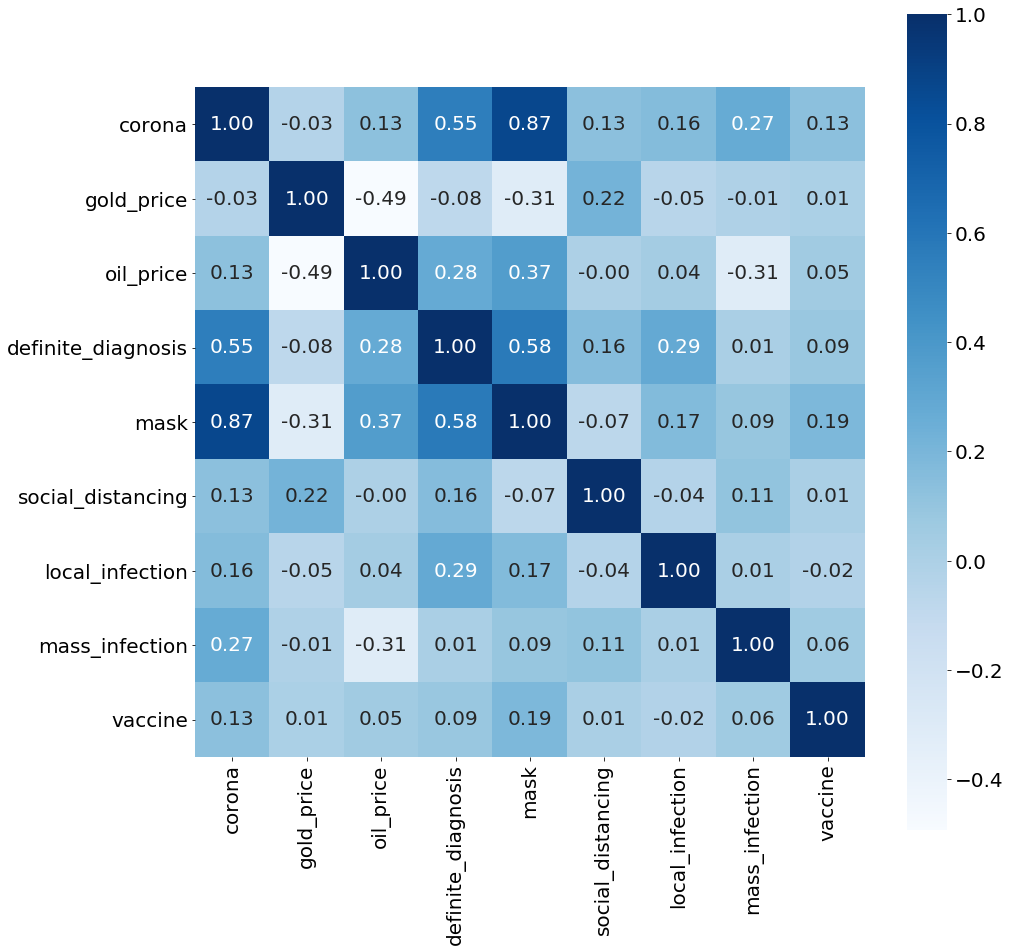

In [336]:
corr = final_data2.corr(method = 'pearson')
print(corr)
plt.figure(figsize=(15, 15))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')


In [337]:
scaler = StandardScaler()
X = scaler.fit_transform(final_data2)
X

array([[-0.8320376 , -1.81966674,  1.62047897, ..., -0.48792776,
        -0.79062283, -0.55978376],
       [-0.83200748, -1.58615815,  1.67951756, ..., -0.48792776,
        -0.79062283, -0.55638465],
       [-0.83205622, -1.30968398,  1.70920223, ..., -0.48792776,
        -0.79062283, -0.55269017],
       ...,
       [ 0.45832267,  1.62131587,  0.02453529, ..., -0.36786116,
         0.13005271,  0.14750652],
       [ 0.29371069,  1.71658738,  0.05306234, ..., -0.37388022,
         0.11721469,  0.12105252],
       [ 0.230108  ,  1.59329484,  0.04760499, ..., -0.36186176,
         0.36771746, -0.01801086]])

In [338]:
X=pd.DataFrame(X)

X.columns = ['코로나','gold_price','oil_price','확진','마스크','사회적거리두기','지역감염','집단감염','백신']

X['date']= final_data['date']

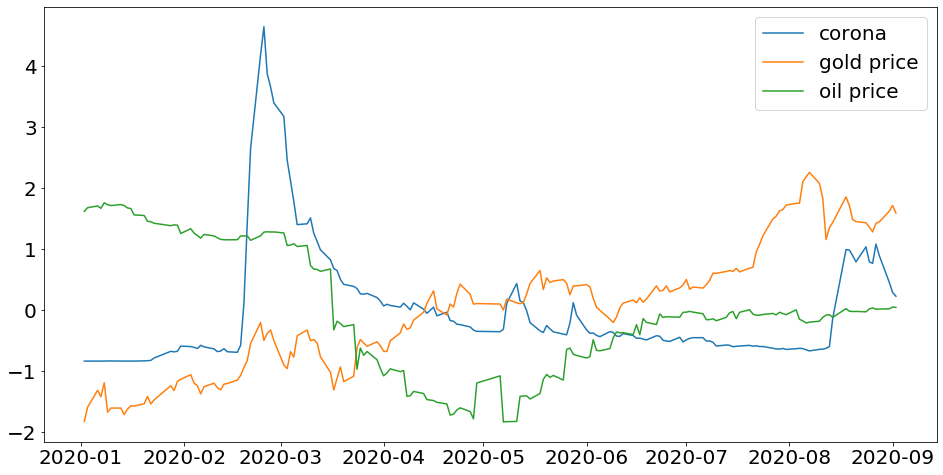

In [339]:
plt.figure(figsize=(16, 8))
# X.columns = ['코로나','gold_price','oil_price','확진','마스크','사회적거리두기','지역감염','집단감염','백신','거리두기']

plt.plot(X.date,X['코로나'],label='corona')
plt.plot(X.date,X.gold_price,label='gold price')
plt.plot(X.date,X.oil_price,label='oil price')
plt.legend()


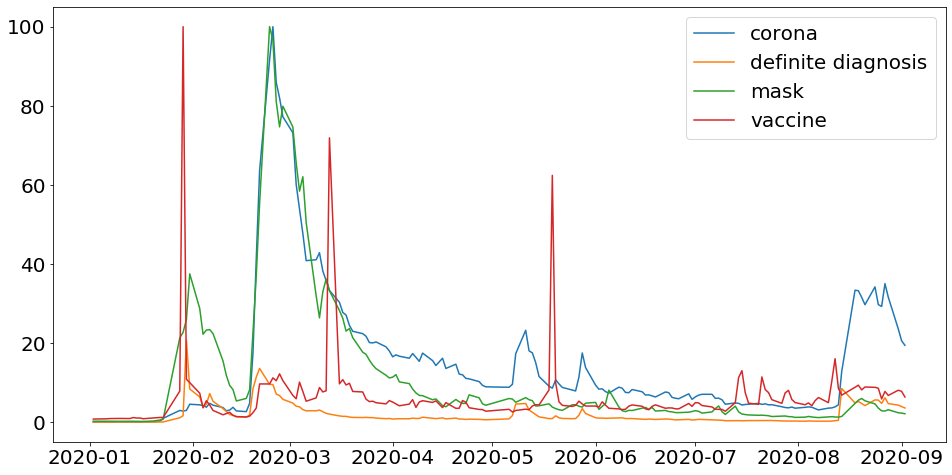

In [359]:

plt.figure(figsize=(16, 8)) #네이버 수치대로
# X.columns = ['코로나','gold_price','oil_price','확진','마스크','사회적거리두기','지역감염','집단감염','백신']


plt.plot(final_data.date,final_data['corona'],label='corona')
plt.plot(final_data.date,final_data['definite_diagnosis'],label='definite diagnosis')
plt.plot(final_data.date,final_data['mask'],label='mask')
plt.plot(final_data.date,final_data['vaccine'],label='vaccine')

plt.legend()

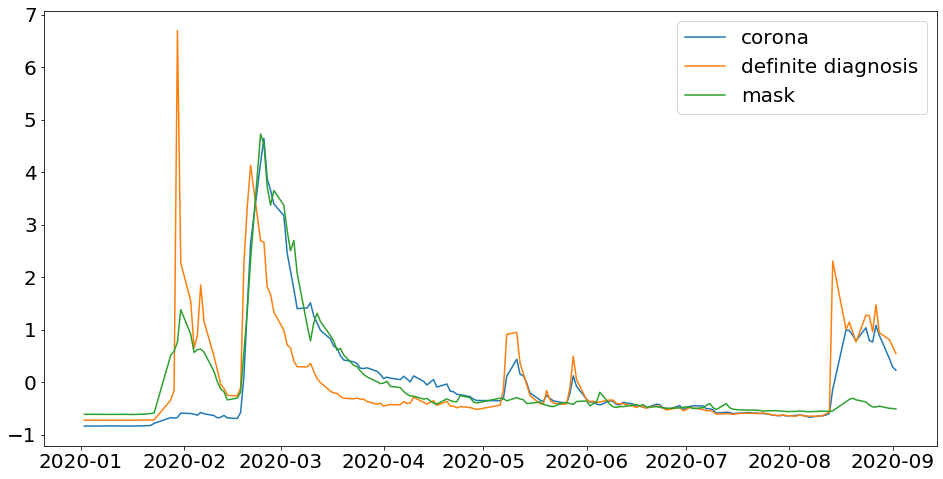

In [361]:
plt.figure(figsize=(16, 8)) # StandardScaler
# X.columns = ['코로나','gold_price','oil_price','확진','마스크','사회적거리두기','지역감염','집단감염','백신']

plt.plot(X.date,X['코로나'],label='corona')
plt.plot(X.date,X['확진'],label='definite diagnosis') #코로나와 유사한 추세
plt.plot(X.date,X['마스크'],label='mask') #마스크에 대한 수요 하락
# plt.plot(X.date,X['백신'],label='vaccine')


plt.legend()

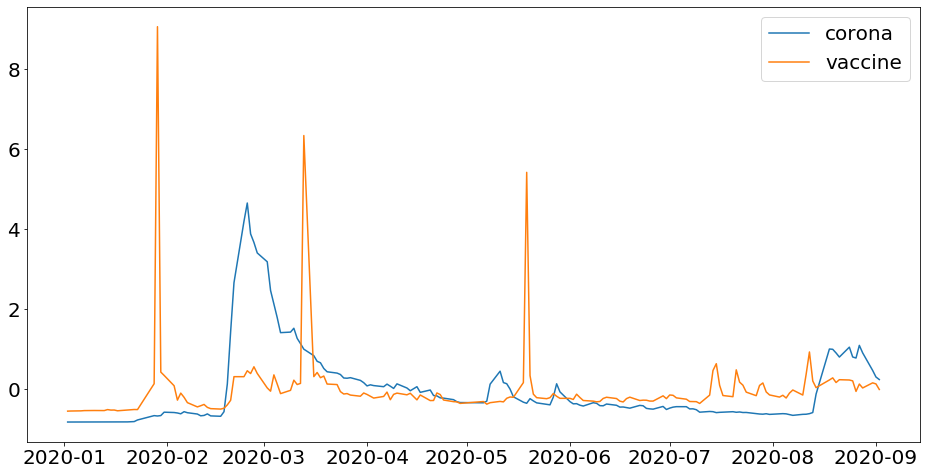

In [360]:
plt.figure(figsize=(16, 8)) # StandardScaler
# X.columns = ['코로나','gold_price','oil_price','확진','마스크','사회적거리두기','지역감염','집단감염','백신']

plt.plot(X.date,X['코로나'],label='corona')
# plt.plot(X.date,X['확진'],label='definite diagnosis') #코로나와 유사한 추세
# plt.plot(X.date,X['마스크'],label='mask') #마스크에 대한 수요 하락
plt.plot(X.date,X['백신'],label='vaccine')


plt.legend()

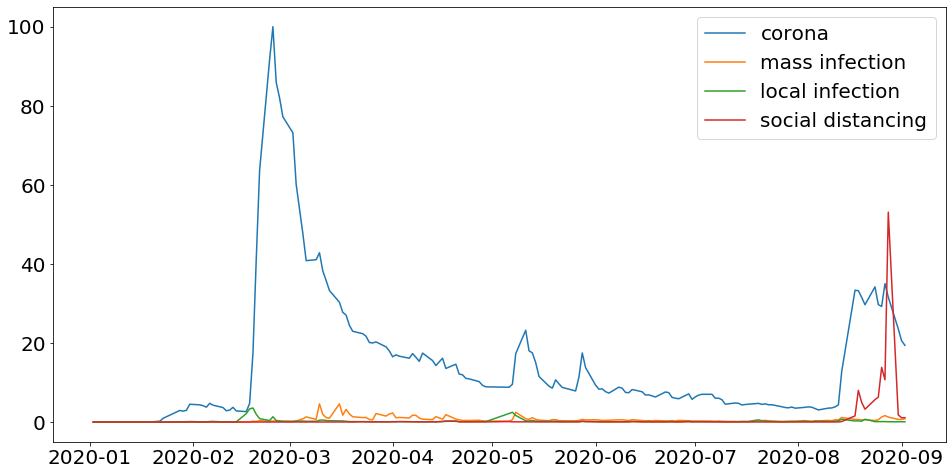

In [357]:
plt.figure(figsize=(16, 8)) #사회 현상 + 네이버 수치

# X.columns = ['코로나','gold_price','oil_price','확진','마스크','사회적거리두기','지역감염','집단감염','백신']


plt.plot(final_data.date,final_data['corona'],label='corona')
plt.plot(final_data.date,final_data['mass_infection'],label='mass infection')
plt.plot(final_data.date,final_data['local_infection'],label='local infection')
plt.plot(final_data.date,final_data['social_distancing'],label='social distancing')

plt.legend()

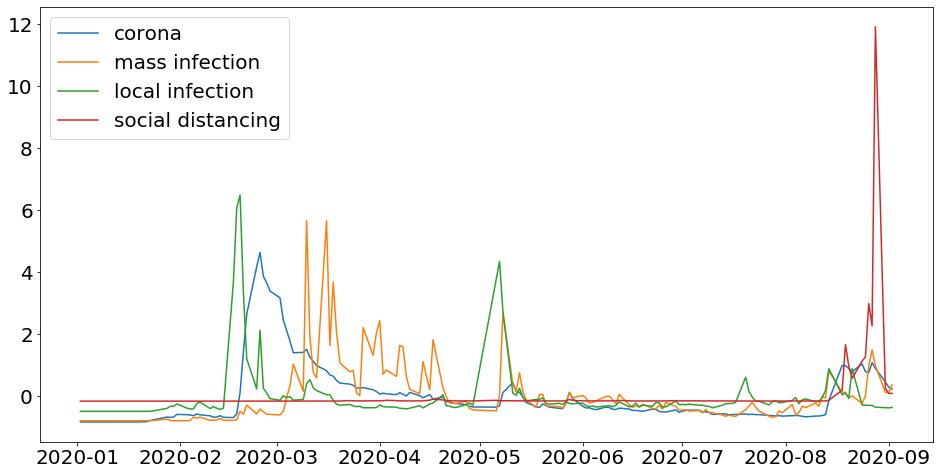

In [353]:
plt.figure(figsize=(16, 8)) #사회 현상 + stardard scaling

# X.columns = ['코로나','gold_price','oil_price','확진','마스크','사회적거리두기','지역감염','집단감염','백신']

plt.plot(X.date,X['코로나'],label='corona')
plt.plot(X.date,X['집단감염'],label='mass infection')
plt.plot(X.date,X['지역감염'],label='local infection')
plt.plot(X.date,X['사회적거리두기'],label='social distancing')

plt.legend()

In [344]:
# plt.figure(figsize=(16, 8))

# X.columns = ['코로나','gold_price','oil_price','확진','마스크','사회적거리두기','지역감염','집단감염','백신']

# plt.plot(X.date,X['확진'],label='d')
# plt.plot(X.date,X['집단감염'],label='mass infection')
# plt.plot(X.date,X['지역감염'],label='local infection')
# plt.plot(X.date,X['사회적거리두기'],label='social distancing')

# plt.legend()

In [345]:
over

,종목단축코드,종목구분,종목한글약명,당일종가,전일대비,단기과열,투자경고,투자위험,지정일자,해제일자,start_date,end_date
0,000020,STK,동화약품,"25,350",400,Y,NaN,NaN,2020/04/24,2020/04/29,2020-04-24,2020-04-29
1,000440,KSQ,중앙에너비스,"7,760",30,Y,NaN,NaN,2020/01/07,2020/01/10,2020-01-07,2020-01-10
2,000545,STK,흥국화재우,"6,140",130,Y,NaN,NaN,2020/02/19,2020/02/24,2020-02-19,2020-02-24
3,000725,STK,현대건설우,"217,500",00,NaN,NaN,NaN,2020/01/10,2020/01/28,2020-01-10,2020-01-28
4,000725,STK,현대건설우,"217,500",00,NaN,NaN,NaN,2020/03/25,2020/04/23,2020-03-25,2020-04-23
...,...,...,...,...,...,...,...,...,...,...,...,...
157,288620,KSQ,에스퓨얼셀,"42,750","1,050",Y,NaN,NaN,2020/06/26,2020/07/01,2020-06-26,2020-07-01
158,289010,KSQ,아이스크림에듀,"9,500",-90,Y,NaN,NaN,2020/02/28,2020/03/04,2020-02-28,2020-03-04
159,298040,STK,효성중공업,"61,900","13,150",Y,NaN,NaN,2020/06/17,2020/06/22,2020-06-17,2020-06-22
160,308100,KSQ,까스텔바작,"9,980",-70,Y,NaN,NaN,2020/01/20,2020/01/23,2020-01-20,2020-01-23


In [346]:
# over['종목단축코드'].nunique()

In [347]:
# over['종목단축코드'].value_counts().sort_values(ascending=False)

In [348]:
# print(over[over['종목단축코드'] == '001067']['종목한글약명'].unique(),
# over[over['종목단축코드'] == '009275']['종목한글약명'].unique(),
# over[over['종목단축코드'] == '016385']['종목한글약명'].unique(),
# over[over['종목단축코드'] == '000725']['종목한글약명'].unique(),
# over[over['종목단축코드'] == '001529']['종목한글약명'].unique())